In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

## a) Create points in unit ball with different dimensions

In [13]:
def create_point_unit_ball(dim: int):
    x = np.random.normal(0, 1, dim)
    x_norm = np.linalg.norm(x)
    x = x / x_norm

    a = np.random.uniform(0, 1)
    rho = np.power(a, 1/4)
    y = rho * x
    return y

In [47]:
def create_points_unit_ball(n: int, dim: int):
    return [create_point_unit_ball(dim) for _ in range(n)]

In [52]:
def geodesic_distance_to_equator(points):
    pts = np.asarray(points)
    single = (pts.ndim == 1)
    if single:
        pts = pts[np.newaxis, :]

    norms = np.linalg.norm(pts, axis=1)
    zero_mask = (norms == 0.0)
    ratio = np.zeros_like(norms)
    nonzero = ~zero_mask
    ratio[nonzero] = np.abs(pts[nonzero, -1]) / norms[nonzero]

    dists = np.arcsin(ratio)
    dists[zero_mask] = np.nan

    return dists[0] if single else dists

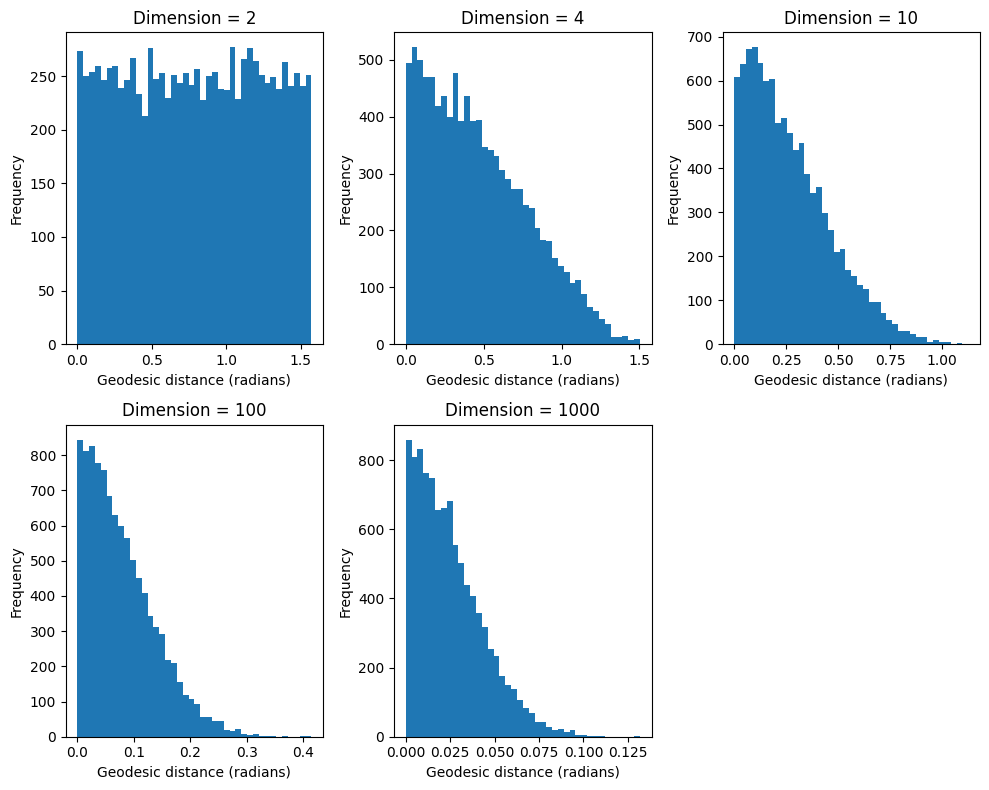

In [53]:
# Dimensions to test
dims = [2, 4, 10, 100, 1000]
n_points = 10_000

plt.figure(figsize=(10, 8))

for i, dim in enumerate(dims, 1):
    points = create_points_unit_ball(n_points, dim)
    distances = geodesic_distance_to_equator(points)

    plt.subplot(2, 3, i)
    plt.hist(distances, bins=40)
    plt.title(f"Dimension = {dim}")
    plt.xlabel("Geodesic distance (radians)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## b) Geodesic Distances to Equator and a Random Hyperplane

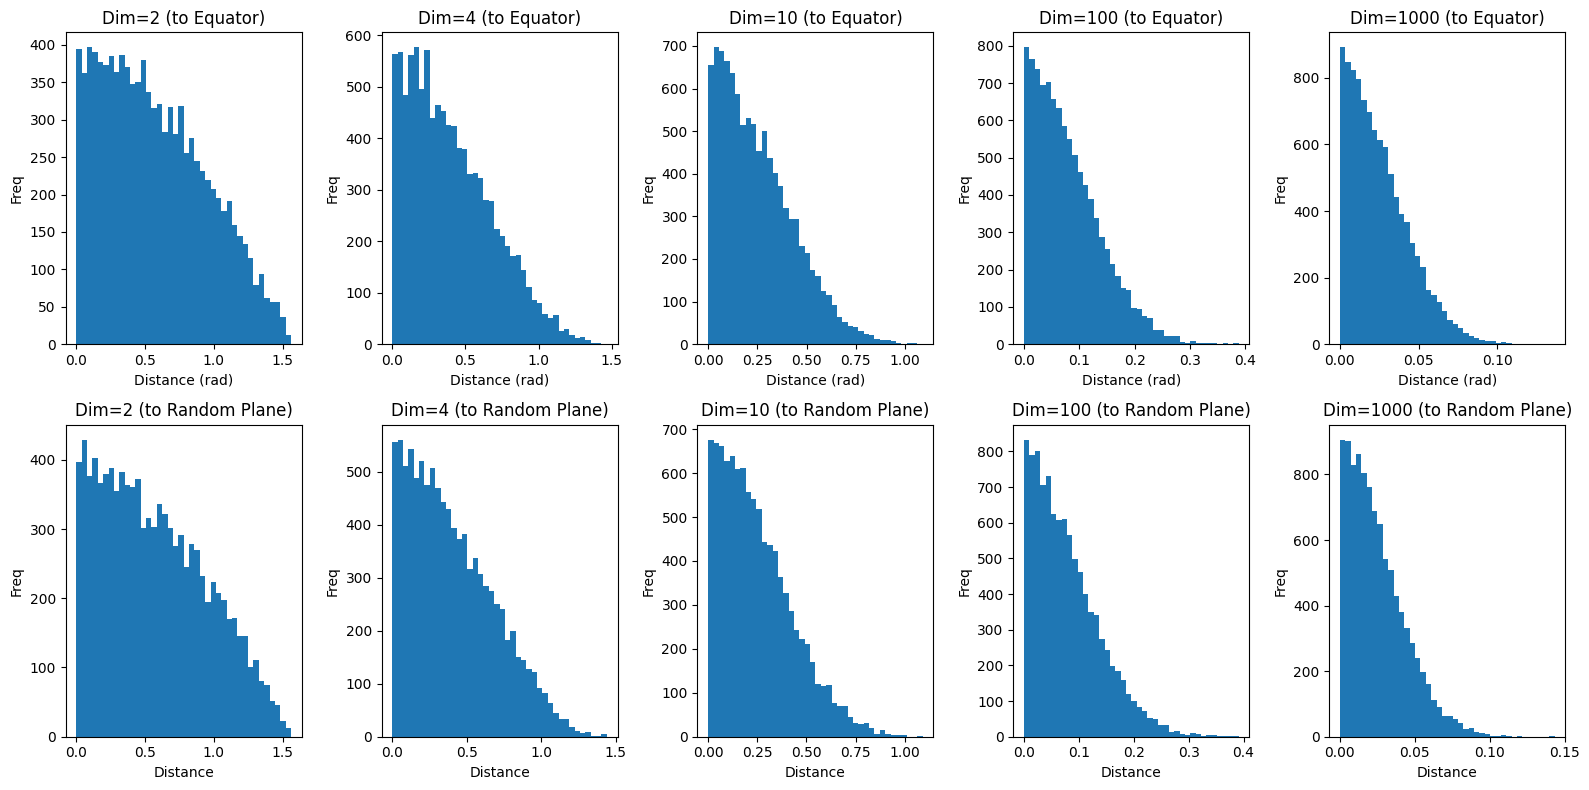

In [56]:
def geodesic_dist_to_equator(points):
    pts = np.asarray(points)
    norms = np.linalg.norm(pts, axis=1)
    ratio = np.abs(pts[:, -1]) / norms
    return np.arcsin(np.clip(ratio, 0, 1))

def geodesic_dist_to_random_plane(points):
    pts = np.asarray(points)
    n = pts.shape[1]
    normal = np.random.normal(0, 1, n)
    normal = normal / np.linalg.norm(normal)

    norms = np.linalg.norm(pts, axis=1)
    unit_pts = pts / norms[:, None]
    ratio = np.abs(unit_pts @ normal)
    return np.arcsin(np.clip(ratio, 0, 1))


dims = [2, 4, 10, 100, 1000]
n_points = 10_000

plt.figure(figsize=(16, 8))

for col, d in enumerate(dims, start=1):

    points = create_points_unit_ball(n_points, d + 1)
    dist_eq = geodesic_dist_to_equator(points)
    dist_rand = geodesic_dist_to_random_plane(points)

    plt.subplot(2, len(dims), col)
    plt.hist(dist_eq, bins=40)
    plt.title(f"Dim={d} (to Equator)")
    plt.xlabel("Distance (rad)")
    plt.ylabel("Freq")

    plt.subplot(2, len(dims), col + len(dims))
    plt.hist(dist_rand, bins=40)
    plt.title(f"Dim={d} (to Random Plane)")
    plt.xlabel("Distance")
    plt.ylabel("Freq")

plt.tight_layout()
plt.show()